<h1 align="center">Descripción de un sistema formado por dados.</h1>
<div align="right">David A. Miranda, PhD<br>2021</div>

## 1. Importar librerías

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

## 2. Planteamiento del problema
Sean $D$ dados, cada uno de ellos con $C$ caras. Un número natural único se utiliza para identificar cada cara, de tal manera que se puede diferenciar una cara de otra.  Si se lanzan los $D$ dados, ¿cuál es el valor más probable obtenido al sumar los números en cada cara?

### 2.1. Especificación del estado del sistema
El sistema, en este caso, corresponde con $D$ dados, cada uno de los cuales puede tener un valor entre 1 y $C$.  Esto quiere decir que para identificar un microestado se requieren $D$ números, correspondientes a los valores obtenidos para los dados.  En este caso el parámetro macroscópico $y$ es la suma de los números en los datos.

### 2.2. Postulado básico
Se asume que cada cara en cada dado es igualmente probable, por lo tanto, el lanzamiento de un dado se se puede modelar con una variable aleatoria uniforme discreta.

### 2.3. Ensamble
En este caso el ensamble corresponderá con un conjunto formado por los sistemas preparados bajo las mismas condiciones, es decir, $D$ dados lanzados $N$ veces.  

Cada microestado está determinado por $C$ números, cuya suma corresponde con el parámetro macroscópico $y$.  Esto implica que por cada uno de los $N$ experimentos existen $C + 1$ números asociados al microestado, siendo $C$ la cantidad de números que especifican dicho microestado y el otro número, el valor para $y$.

### 2.4. Determinación de la probabilidad $P(y)$
La probabilidad $P(y)$ que la suma de las caras de los dados esté entre $y$ e $y+\delta y$ está determinada por el cociente entre el número de microestados en el ensamble con $y$ entre $y$ e $y+\delta y$ dividida por el total de experimentos $N$.

In [2]:
D = 4 # Número de dados
C = 6 # Número de caras de un dado
N = 1000 # Número de sistemas en el ensamble

## 3. Un dado: variable aleatoria uniforme discreta

In [3]:
p = np.random.randint(low=1, high=C+1, size=N)

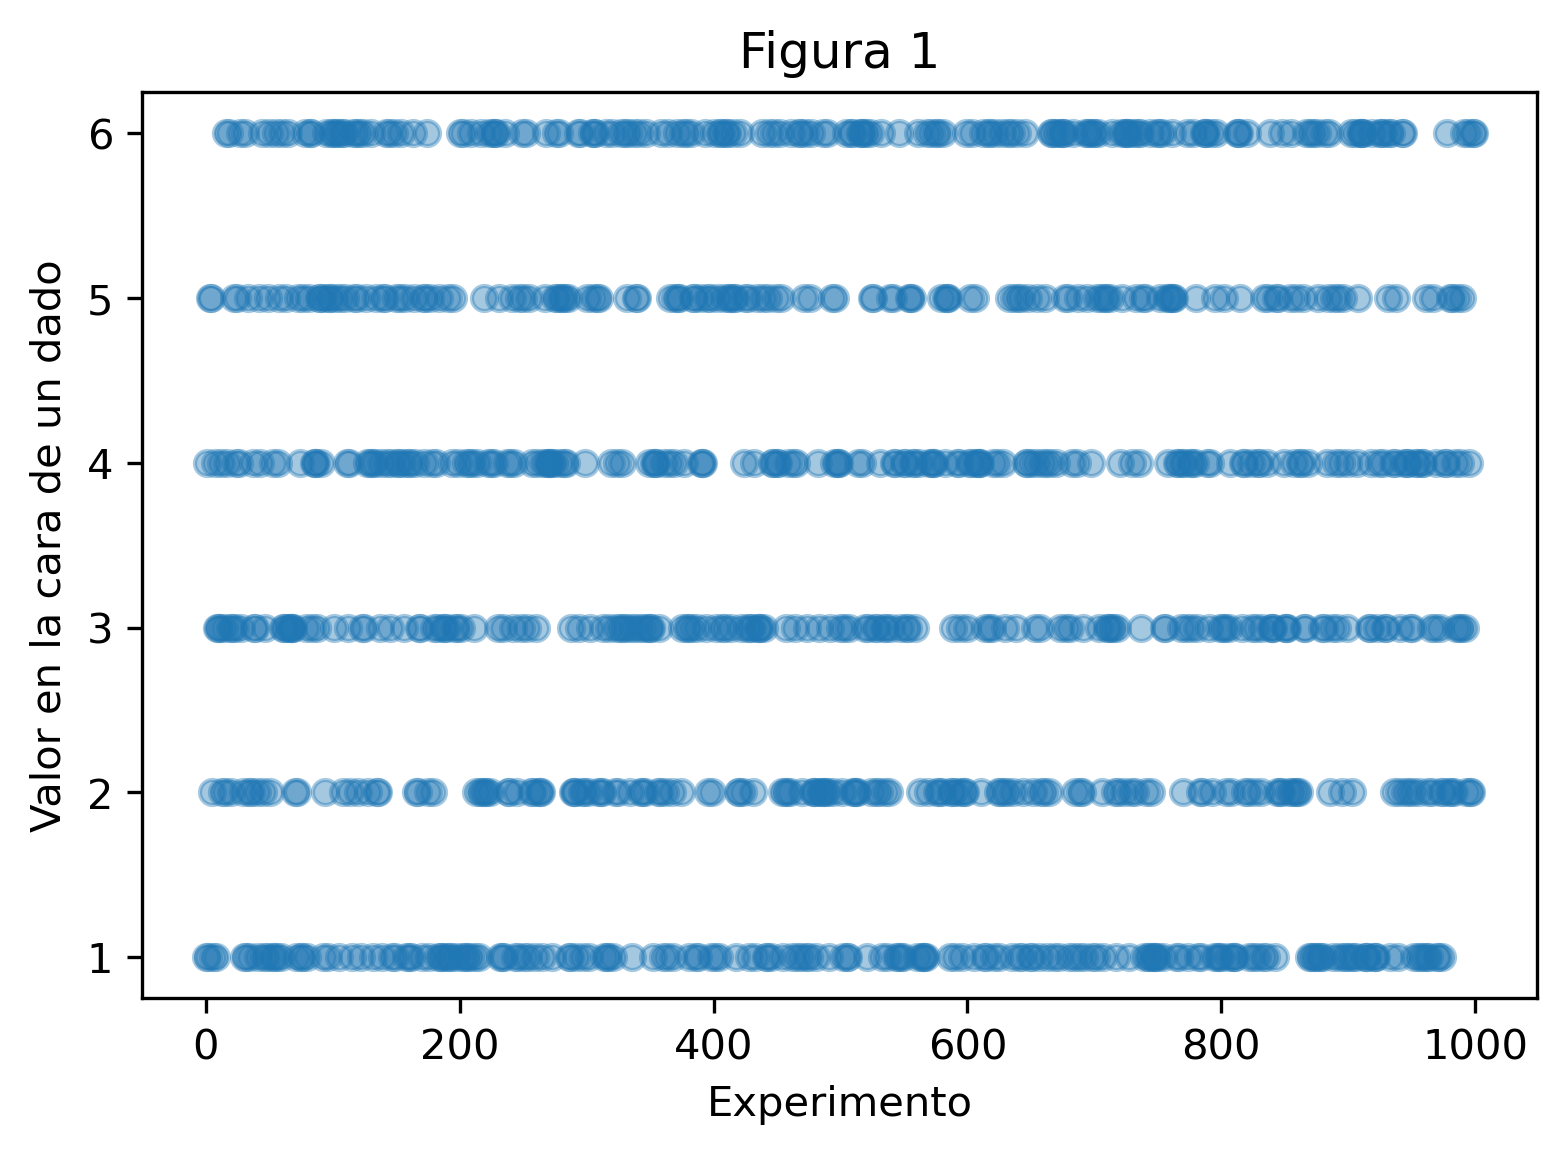

In [4]:
plt.figure(dpi=300)
plt.plot(p, 'o', alpha=0.4)
plt.xlabel('Experimento')
plt.ylabel('Valor en la cara de un dado')
_ = plt.title('Figura 1')

## 4. Modelo y simulación
### 4.1. Construcción del ensamble

In [5]:
ensamble_dict = {}
for d in range(D):
    key = 'd%d' % (d+1)
    values = np.random.randint(low=1, high=C+1, size=N)
    ensamble_dict[key] = list(values)
ensamble = pd.DataFrame(ensamble_dict)
ensamble['y'] = ensamble.sum(axis=1)
ensamble

,d1,d2,d3,d4,y
0,6,6,1,3,16
1,1,5,5,2,13
2,3,4,2,3,12
3,4,3,2,4,13
4,3,6,4,5,18
...,...,...,...,...,...
995,2,2,6,5,15
996,6,5,1,6,18
997,3,1,1,6,11
998,2,4,6,6,18


### 4.2. Descripción del ensamble

In [6]:
ensamble.describe()

,d1,d2,d3,d4,y
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,3.517000,3.441000,3.596000,3.505000,14.05900
std,1.768853,1.748593,1.710471,1.713742,3.44636
min,1.000000,1.000000,1.000000,1.000000,4.00000
25%,2.000000,2.000000,2.000000,2.000000,12.00000
50%,4.000000,3.000000,4.000000,3.000000,14.00000
75%,5.000000,5.000000,5.000000,5.000000,17.00000
max,6.000000,6.000000,6.000000,6.000000,23.00000


## 4.3. Número de estados entre $y$ e $y+\delta y$

In [7]:
bins = 10
y = ensamble.y.to_numpy()
dy = (C*D - D) / bins
y_bins = np.linspace(D, C*D - dy, bins)
num_estados_y = [np.count_nonzero((y >= yk) & (y < yk + dy)) for yk in y_bins]
num_estados = sum(num_estados_y)

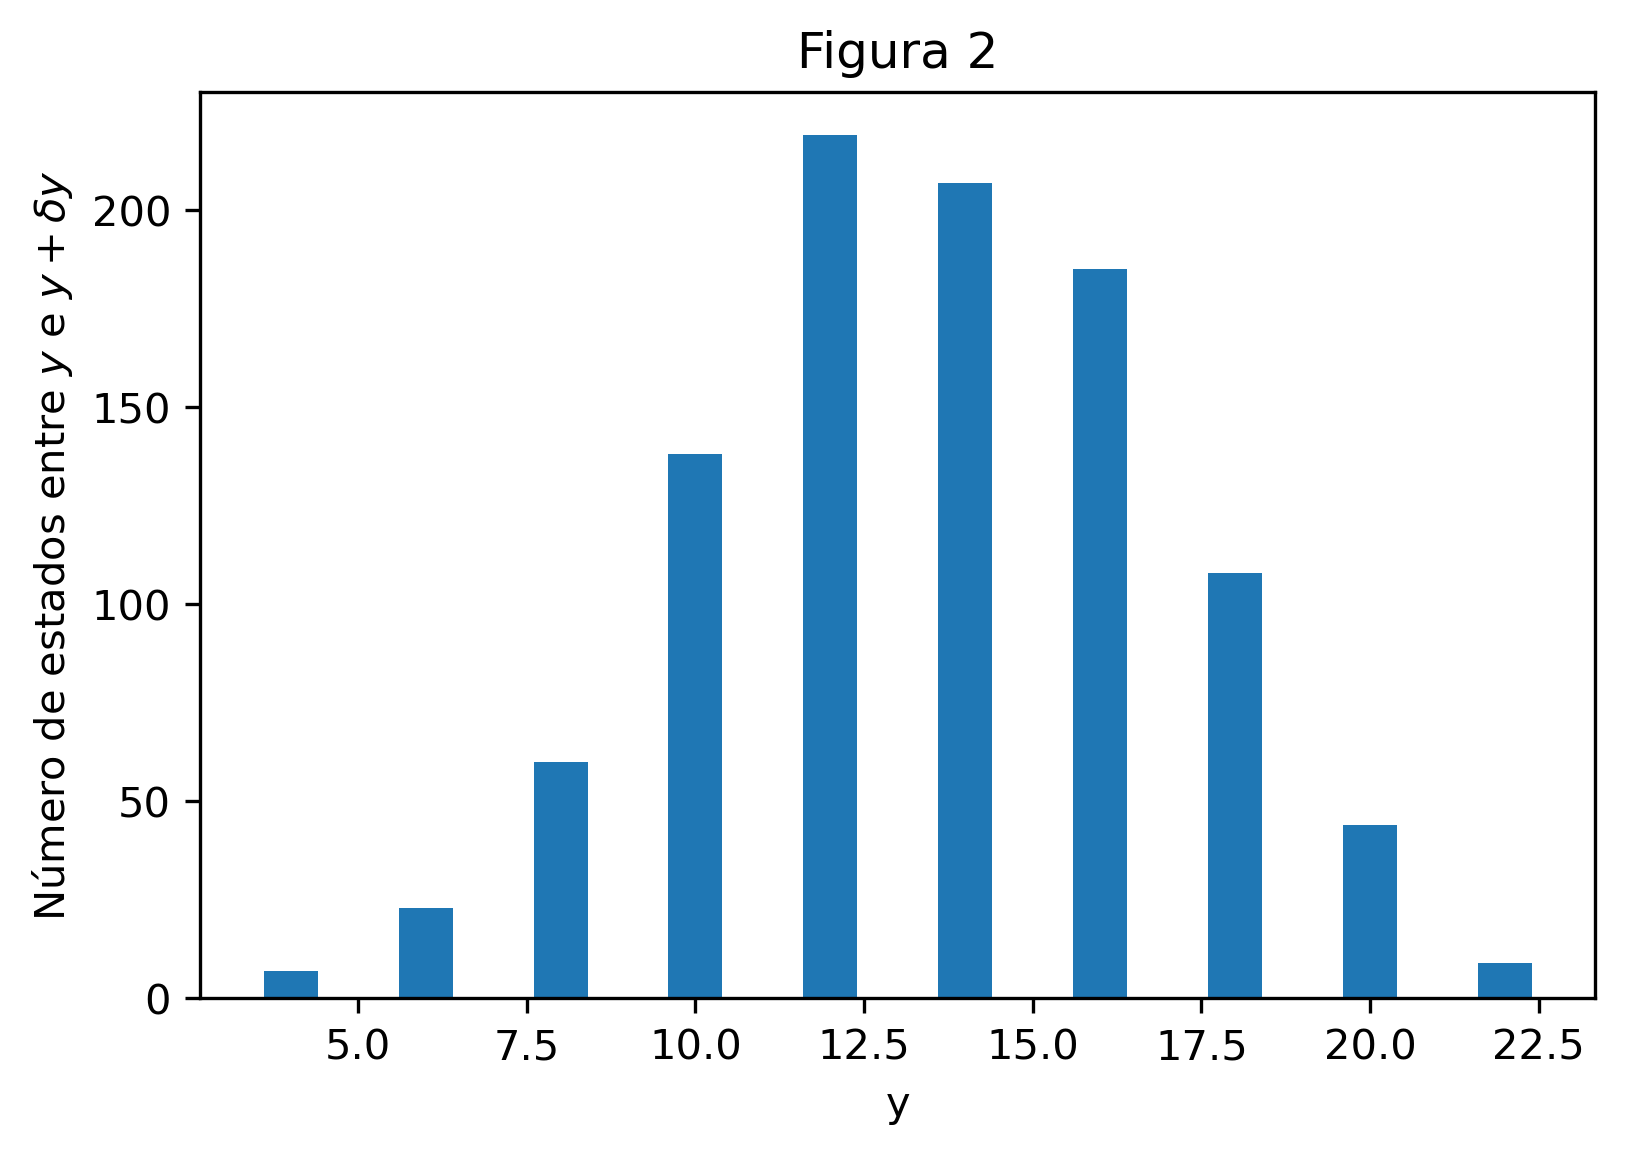

In [8]:
plt.figure(dpi=300)
plt.bar(x=y_bins, height=num_estados_y)
plt.xlabel('y')
plt.ylabel(r'Número de estados entre $y$ e $y + \delta y$')
_ = plt.title('Figura 2')

## 4.4. Probabilidad de encontrar el microestado para $y$ entre $y$ e $y + \delta y$

In [9]:
P = np.array(num_estados_y) / num_estados

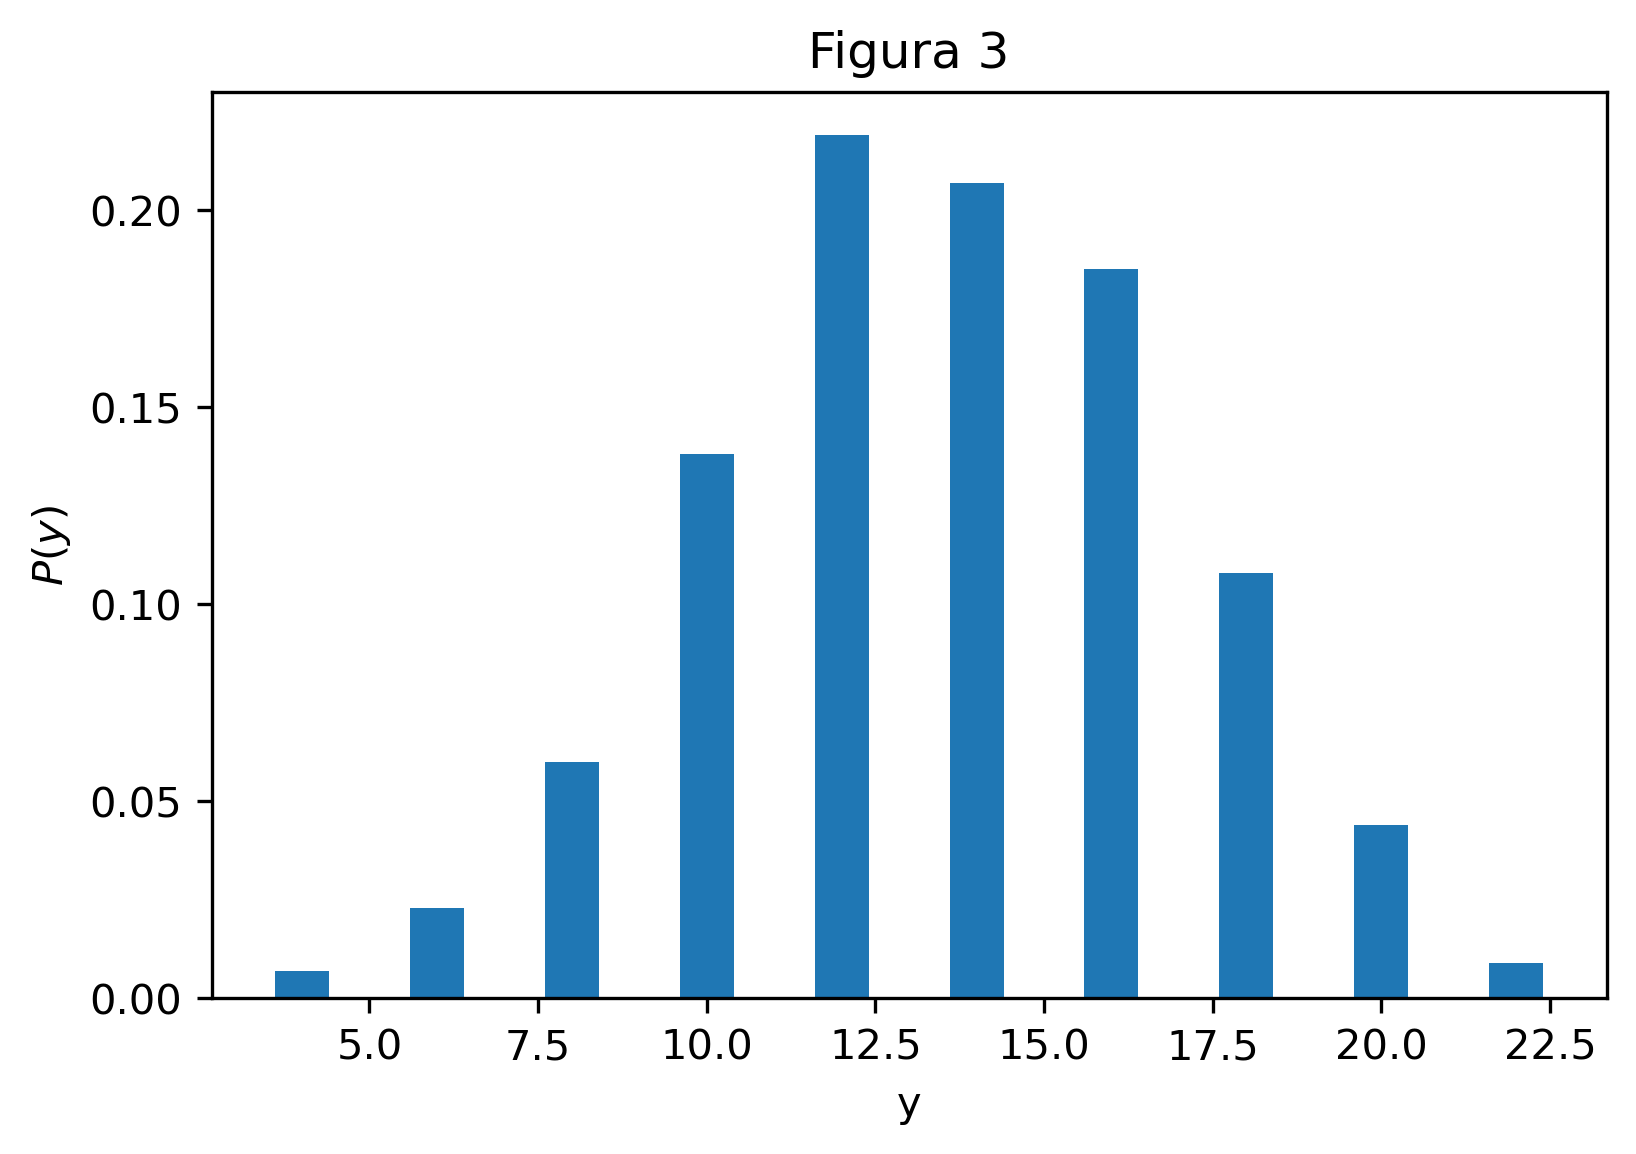

In [10]:
plt.figure(dpi=300)
plt.bar(x=y_bins, height=P)
plt.xlabel('y')
plt.ylabel(r'$P(y)$')
_ = plt.title('Figura 3')

## 5. Preguntas de autoexplicación

End!